# Planejamento de vendas: Como direcionar o time para os clientes certos?

Este arquivo é construido como apoio ao artigo: 'https://vinicio-schmidt.medium.com/planejamento-de-vendas-como-direcionar-o-time-para-os-clientes-certos-b7a6c7b72eef'

## Setup

In [1]:
import numpy as np
import pandas as pd
np.random.seed(42)
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image

import seaborn as sns

## O que é Regressão Logística?

In [2]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

Separar a largura da pétala, transformar as classes numéricas em números é próximo passo.

In [3]:
X = iris["data"][:, 3:] #lagura da pétla
#1 se Iris-Virginica, 0 para as demais
y = (iris["target"] == 2).astype(np.int)

## Limites de decisão

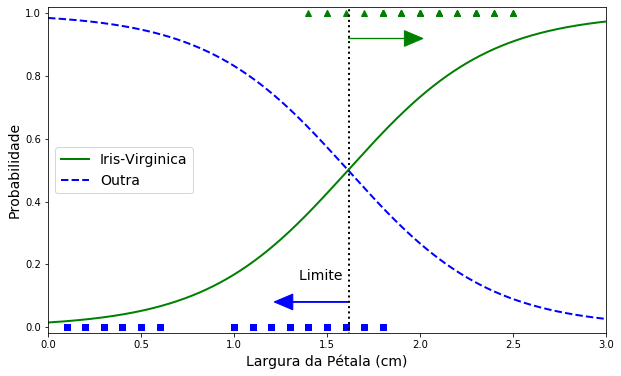

In [4]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="liblinear", random_state=42)
log_reg.fit(X, y)

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(10, 6))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Outra")
plt.text(decision_boundary+0.02, 0.15, "Limite              ", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')

plt.xlabel("Largura da Pétala (cm)", fontsize=14)
plt.ylabel("Probabilidade", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])

plt.savefig('D:\\Documentos\\Estudos\\Rentabilidade do sistema de marketing\\4 - Regressão Logística\\iris.png', dpi=500)

plt.show()

## Saindo da jardinagem e entrando no mundo dos negócios

In [5]:
import pandas as pd
path = 'dados\\leads.xlsx'
df_leads = pd.read_excel(path)
df_leads.head()

,ID do Cliente,Origem do Cliente,Não receber emails,Não receber ligações,Visitas ao site,Última atividade,Veio por recomendação,Conseguiu vender
0,660737,Chat,0,0,0,Visita ao website,0,0
1,660728,Busca orgânica,0,0,5,Email aberto,0,0
2,660727,Tráfego direto,0,0,2,Email aberto,0,1
3,660719,Tráfego direto,0,0,1,Inacessível,0,0
4,660681,Google,0,0,2,Convertido para lead,0,1


In [6]:
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 8 columns):
ID do Cliente            9240 non-null int64
Origem do Cliente        9240 non-null object
Não receber emails       9240 non-null int64
Não receber ligações     9240 non-null int64
Visitas ao site          9240 non-null int64
Última atividade         9240 non-null object
Veio por recomendação    9240 non-null int64
Conseguiu vender         9240 non-null int64
dtypes: int64(6), object(2)
memory usage: 577.6+ KB


In [7]:
from sklearn.preprocessing import LabelEncoder

df_leads['Origem do Cliente'] = LabelEncoder().fit_transform(df_leads['Origem do Cliente'])
df_leads['Última atividade'] = LabelEncoder().fit_transform(df_leads['Última atividade'])

df_leads.head()

,ID do Cliente,Origem do Cliente,Não receber emails,Não receber ligações,Visitas ao site,Última atividade,Veio por recomendação,Conseguiu vender
0,660737,2,0,0,0,14,0,0
1,660728,1,0,0,5,6,0,0
2,660727,11,0,0,2,6,0,1
3,660719,11,0,0,1,8,0,0
4,660681,6,0,0,2,3,0,1


In [8]:
entradas = df_leads.drop(['Conseguiu vender', 'ID do Cliente'],axis=1)
saidas = df_leads['Conseguiu vender']

In [9]:
entradas.head(1)

,Origem do Cliente,Não receber emails,Não receber ligações,Visitas ao site,Última atividade,Veio por recomendação
0,2,0,0,0,14,0


In [10]:
saidas.head(1)

0    0
Name: Conseguiu vender, dtype: int64

In [11]:
from sklearn.preprocessing import StandardScaler

df_final = StandardScaler().fit_transform(df_leads)

df_final

array([[ 1.86067372, -1.12691235, -0.29375505, ...,  1.57527342,
        -0.02753453, -0.791863  ],
       [ 1.86028918, -1.39940974, -0.29375505, ..., -0.46163968,
        -0.02753453, -0.791863  ],
       [ 1.86024646,  1.32556413, -0.29375505, ..., -0.46163968,
        -0.02753453,  1.2628447 ],
       ...,
       [-1.60836878,  1.32556413,  3.4041968 , ...,  1.06604515,
        -0.02753453, -0.791863  ],
       [-1.60866787, -0.03692281, -0.29375505, ...,  1.06604515,
        -0.02753453,  1.2628447 ],
       [-1.6088815 ,  1.32556413, -0.29375505, ...,  1.06604515,
        -0.02753453,  1.2628447 ]])

In [12]:
from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(entradas, 
                                                        saidas, 
                                                        test_size=0.33, 
                                                        random_state=42)

In [13]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver="lbfgs")
log_reg.fit(x_treino, y_treino)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Fazendo predições

In [14]:
y_pred = log_reg.predict(x_teste) #Classificação
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [15]:
y_pred_proba = log_reg.predict_proba(x_teste)[:,1] #Probabilidades de fechar negócio
y_pred_proba

array([0.32061666, 0.11566387, 0.11632445, ..., 0.64887071, 0.33645292,
       0.33659182])

## Teste de precisão

In [16]:
from sklearn.metrics import classification_report

print(classification_report(y_teste, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.75      0.73      1848
           1       0.57      0.52      0.55      1202

    accuracy                           0.66      3050
   macro avg       0.64      0.63      0.64      3050
weighted avg       0.65      0.66      0.66      3050



## Relatório Final

In [19]:
report = df_leads.copy()

report['% de fechar'] = log_reg.predict_proba(entradas)[:,1]
report = report.sort_values(by=['% de fechar'], ascending=False)
report['% de fechar'] = report['% de fechar'].apply(lambda w: "{:.2%}".format(w))

report = report.loc[:, ['ID do Cliente', '% de fechar']]
report.head()

,ID do Cliente,% de fechar
6699,598425,79.89%
5193,610092,78.62%
931,650419,67.93%
237,657971,65.50%
280,657426,65.50%


In [22]:
report = df_leads.copy()

report['% de fechar'] = log_reg.predict_proba(entradas)[:,1]
report = report.sort_values(by=['% de fechar'], ascending=False)
report = report.loc[:, ['ID do Cliente', '% de fechar']]
report.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9240 entries, 6699 to 7647
Data columns (total 2 columns):
ID do Cliente    9240 non-null int64
% de fechar      9240 non-null float64
dtypes: float64(1), int64(1)
memory usage: 216.6 KB
